The dataset given below contains the census information about the attributes of individuals as the features and their income as the target. The task is to predict whether a person makes over $50K a year or not



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report

In [2]:
#load dataset
df=pd.read_csv('salary.csv')
df.head()

,Unnamed: 0,age,Workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [3]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [4]:
df.head(1)

,age,Workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0


In [5]:
df.isnull().sum()

age               0
Workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Income            0
dtype: int64

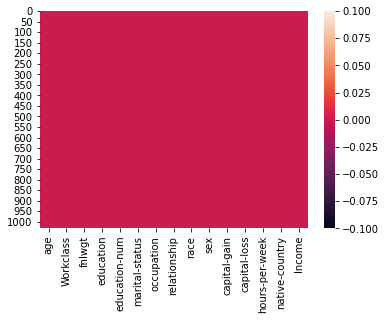

In [6]:
sns.heatmap(df.isnull())
plt.show()

In [7]:
#there is no null observations in data set
#check of data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032 entries, 0 to 1031
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             1032 non-null   int64 
 1   Workclass       1032 non-null   object
 2   fnlwgt          1032 non-null   int64 
 3   education       1032 non-null   object
 4   education-num   1032 non-null   int64 
 5   marital-status  1032 non-null   object
 6   occupation      1032 non-null   object
 7   relationship    1032 non-null   object
 8   race            1032 non-null   object
 9   sex             1032 non-null   object
 10  capital-gain    1032 non-null   int64 
 11  capital-loss    1032 non-null   int64 
 12  hours-per-week  1032 non-null   int64 
 13  native-country  1032 non-null   object
 14  Income          1032 non-null   int64 
dtypes: int64(7), object(8)
memory usage: 121.1+ KB


In [8]:
#separate object type columns and numerical columns in two different datasets
df1=df.select_dtypes(object)
df2=df.select_dtypes(['float','int64'])
print('Categorical dataset ')
print(df1.info())
print('Numerical dataset ')
print(df2.info())

Categorical dataset 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032 entries, 0 to 1031
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Workclass       1032 non-null   object
 1   education       1032 non-null   object
 2   marital-status  1032 non-null   object
 3   occupation      1032 non-null   object
 4   relationship    1032 non-null   object
 5   race            1032 non-null   object
 6   sex             1032 non-null   object
 7   native-country  1032 non-null   object
dtypes: object(8)
memory usage: 64.6+ KB
None
Numerical dataset 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032 entries, 0 to 1031
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             1032 non-null   int64
 1   fnlwgt          1032 non-null   int64
 2   education-num   1032 non-null   int64
 3   capital-gain    1032 non-null   int64
 4  

In [9]:
#use LabelEncoder to convert categorical datatype into nymerical data type
from sklearn.preprocessing import LabelEncoder
for col in df1:
    obj=LabelEncoder()
    df1[col]=obj.fit_transform(df1[[col]])

In [10]:
df1.head()

,Workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,5,9,4,0,1,4,1,28
1,4,9,2,3,0,4,1,28
2,2,11,0,5,1,4,1,28
3,2,1,2,5,0,2,1,28
4,2,9,2,9,5,2,0,4


age
Skewness 
 0.6160534414050984


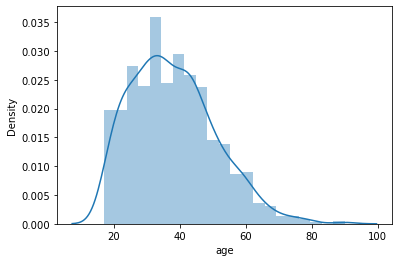

fnlwgt
Skewness 
 1.3937557919747436


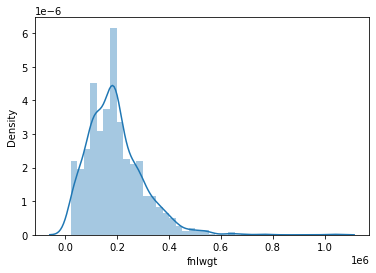

education-num
Skewness 
 -0.30220179407263364


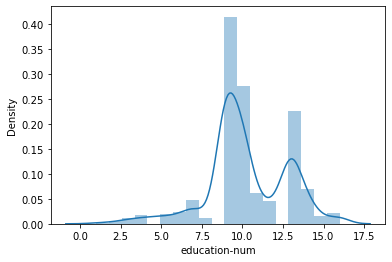

capital-gain
Skewness 
 5.409818233508558


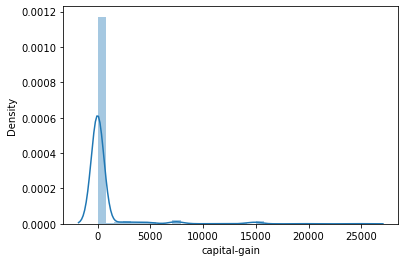

capital-loss
Skewness 
 4.071696903313479


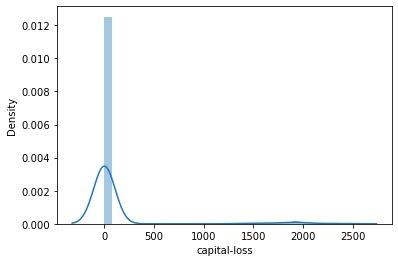

hours-per-week
Skewness 
 0.16318627165535773


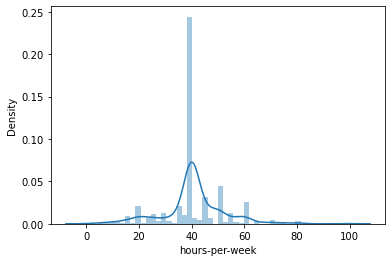

Income
Skewness 
 1.178757937442845


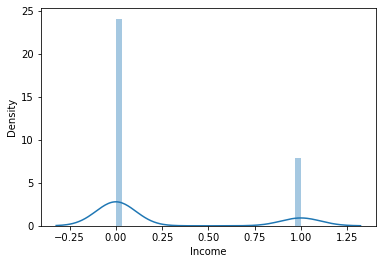

In [11]:
#check skewness for numerical dataset
from scipy.stats import skew
for col in df2:
    print(col)
    print('Skewness \n',skew(df2[col]))
    sns.distplot(df2[col])
    plt.show()

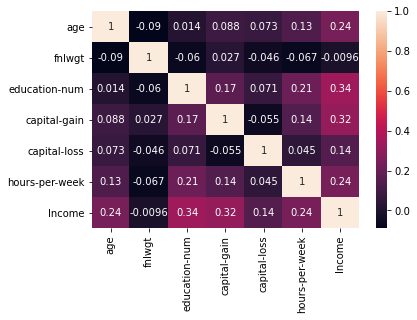

In [12]:
#to reduce skewness we check for correlation coefficient
sns.heatmap(df2.corr(),annot=True)
plt.show()

In [13]:
#check for negative values in data sets column
for col in df2.drop('Income',axis=1):
    print(col)
    print(df2[df2[col]<0])

age
Empty DataFrame
Columns: [age, fnlwgt, education-num, capital-gain, capital-loss, hours-per-week, Income]
Index: []
fnlwgt
Empty DataFrame
Columns: [age, fnlwgt, education-num, capital-gain, capital-loss, hours-per-week, Income]
Index: []
education-num
Empty DataFrame
Columns: [age, fnlwgt, education-num, capital-gain, capital-loss, hours-per-week, Income]
Index: []
capital-gain
Empty DataFrame
Columns: [age, fnlwgt, education-num, capital-gain, capital-loss, hours-per-week, Income]
Index: []
capital-loss
Empty DataFrame
Columns: [age, fnlwgt, education-num, capital-gain, capital-loss, hours-per-week, Income]
Index: []
hours-per-week
Empty DataFrame
Columns: [age, fnlwgt, education-num, capital-gain, capital-loss, hours-per-week, Income]
Index: []


In [14]:
#reduce skewness
for col in df2.drop(['education-num','Income'],axis=1):
    df2[col]=np.sqrt(df2[col])

In [15]:
df2.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,Income
0,6.244998,278.416954,13,46.626173,0.0,6.324555,0
1,7.071068,288.636450,13,0.000000,0.0,3.605551,0
2,6.164414,464.377002,9,0.000000,0.0,6.324555,0
3,7.280110,484.480134,7,0.000000,0.0,6.324555,0
4,5.291503,581.729318,13,0.000000,0.0,6.324555,0


In [16]:
#check skewness for numerical dataset
print('Skewness')
for col in df2:
    print(col)
    print(skew(df2[col]))

Skewness
age
0.21910459171574712
fnlwgt
0.21998857739082903
education-num
-0.30220179407263364
capital-gain
3.876616230491302
capital-loss
3.9470057673340535
hours-per-week
-0.9472706573979555
Income
1.178757937442845


In [17]:
#combine two datasets
df_new=pd.concat([df1,df2],axis=1)
df_new.head()

,Workclass,education,marital-status,occupation,relationship,race,sex,native-country,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,Income
0,5,9,4,0,1,4,1,28,6.244998,278.416954,13,46.626173,0.0,6.324555,0
1,4,9,2,3,0,4,1,28,7.071068,288.636450,13,0.000000,0.0,3.605551,0
2,2,11,0,5,1,4,1,28,6.164414,464.377002,9,0.000000,0.0,6.324555,0
3,2,1,2,5,0,2,1,28,7.280110,484.480134,7,0.000000,0.0,6.324555,0
4,2,9,2,9,5,2,0,4,5.291503,581.729318,13,0.000000,0.0,6.324555,0


In [18]:
X=df_new.drop('Income',axis=1)#input variables
Y=df_new['Income']#target variable

In [19]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [20]:
#scaling
from sklearn.preprocessing import StandardScaler
obj=StandardScaler()
x_train=obj.fit_transform(x_train)
x_test=obj.transform(x_test)

In [21]:
print('Original Dataset size : ',df_new.shape)
print('Training input dataset size : ', x_train.shape)
print('Training output dataset size : ', y_train.shape)
print('Testing input dataset size : ', x_test.shape)
print('Testing output dataset size : ', y_test.shape)

Original Dataset size :  (1032, 15)
Training input dataset size :  (722, 14)
Training output dataset size :  (722,)
Testing input dataset size :  (310, 14)
Testing output dataset size :  (310,)


In [22]:
#create object of model LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train) #train model

LogisticRegression()

In [23]:
y_pred=lr.predict(x_test)
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,

In [33]:
AP=AN=0
for i in y_test:
    if i==1:
        AP+=1
    else:
        AN+=1
print('Actual positive : ',AP)
print('Actual negative : ',AN)
PP=PN=0
for i in y_pred:
    if i==1:
        PP+=1
    else:
        PN+=1
print('Predicted positive : ',PP)
print('Predicted negative : ',PN)

Actual positive :  72
Actual negative :  238
Predicted positive :  39
Predicted negative :  271


In [29]:
print('Testing score ')
score=lr.score(x_test,y_test)
round(score,2)

Testing score 


0.83

In [30]:
#accuracy is 83% but we will not depend upon accuracy
#evaluation of metrics
#find recall precision f1 score
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90       238
           1       0.74      0.40      0.52        72

    accuracy                           0.83       310
   macro avg       0.79      0.68      0.71       310
weighted avg       0.82      0.83      0.81       310



In [34]:
confusion_matrix=confusion_matrix(y_test,y_pred)
print(confusion_matrix)

[[228  10]
 [ 43  29]]


In [36]:
confusion_matrix=confusion_matrix.ravel()
TN,FP,FN,TP=confusion_matrix
print('True Negative : ',TN)
print('False Positive : ',FP)
print('False Negative : ',FN)
print('True Positive : ',TP)

True Negative :  228
False Positive :  10
False Negative :  43
True Positive :  29


In [37]:
print('True Positive + False Positive = ',TP+FP)
print('True Negative + False Negative = ',TN+FN)
print('Predicted positive : ',PP)
print('Predicted negative : ',PN)

True Positive + False Positive =  39
True Negative + False Negative =  271
Predicted positive :  39
Predicted negative :  271
